# Interpreting South Kona Spectra

In this notebook I extract spectra from VSWIR data of a small region of South Kona that includes the Kona Paradise subdivision. The spectra represent various objects on the landscape: trees, rows of orchard crops, road segments, swimming pools, solar panels, and - mainly - rooftops. Using various sets of published spectra of roofing materials, I am able to associate certain spectral shapes and individual spectral features with various materials and their properties. I can then classify each VSWIR roof spectrum according to material and visible color (with varying degrees of confidence). Skip down to [here](#Trees) to read about the spectra.

## Read Files and Prepare Data

In [1]:
"""
Import libraries, including the custom modules that do all the behind-the-scenes work
"""

import matplotlib.pyplot as plt
import spectral_utils
import spectral_libraries as speclib

%load_ext autoreload
%autoreload 2

In [2]:
"""
Define paths and a couple of other variables
"""

#paths to input data, shapefiles, spectral libraries
#when I'm working with data subsets, tifs and header files might not live in the same directory
data_path = '/data/gdcsdata/test_directory/rmason_test/'
header_path = '/data/gdcsdata/HawaiiMapping/Focal_Watershed_Mosaics/SKona/tiles/tile024/'
feature_path = '/data/gdcsdata/test_directory/rmason_test/'
library_path = '/home/remason2/spectral_libraries/'

#paths for output files (spectra, plots)
out_path = 'SKona/tile24/'

roi = None #Subset to use, if any; like (1331, 4460, 1000, 1000)
color_bands = [31, 21, 11] #Bands to use as R, G, B 

In [3]:
%%time
"""
Read the imaging spectroscopy data cube, shade mask and band:wavelength mapping
"""

prepare = spectral_utils.Prepare(data_path=data_path, header_path=header_path, out_path=out_path)

refl, meta = prepare.read_raster(file='tile24_subset_refl.tif', roi=roi)

shade_mask, _ = prepare.read_raster(file='tile24_subset_shade50cm.tif', roi=roi)

wavelengths = prepare.read_wavelengths(hdr_file='SKona_tile024_mosaic_refl.hdr')

Reading /data/gdcsdata/test_directory/rmason_test/tile24_subset_refl.tif
Reading /data/gdcsdata/test_directory/rmason_test/tile24_subset_shade50cm.tif
CPU times: user 802 ms, sys: 3.22 s, total: 4.03 s
Wall time: 6.66 s


In [4]:
%%time
"""
Apply shade mask and write file from which spectra will be extracted
"""

masked = prepare.apply_shade_mask(refl, shade_mask)
prepare.write_raster(masked, meta, 'roi_masked.tif')

47.3% of pixels are classed as shaded
CPU times: user 2.75 s, sys: 6.45 s, total: 9.2 s
Wall time: 20 s


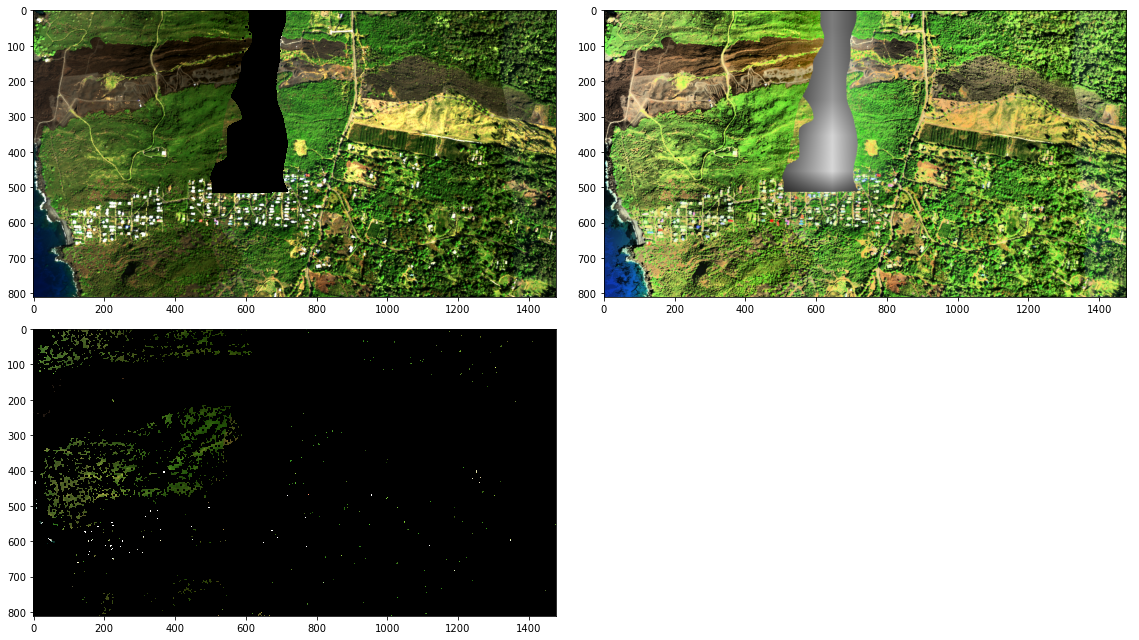

In [5]:
"""
Display unmodified and shade-masked data to make sure everything looks reasonable
"""

show = spectral_utils.Display(figure_path=out_path)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 9))

#unmodified, without (left) and with (right) local contrast enhancement
rgb = show.make_rgb(refl, bands=color_bands)
show.show_rgb(rgb, meta, ax=ax1)
show.fancy_rgb(rgb, ax=ax2)

#with shade mask applied
rgb_masked = show.make_rgb(masked, bands=color_bands)
show.show_rgb(rgb_masked, meta, ax=ax3)

ax4.axis('off')

plt.tight_layout()

## Extract spectra

Extract spectra of features in shapefiles created in QGIS (e.g. buildings)

In [6]:
extract = spectral_utils.Extract(feature_path=feature_path, output_path=out_path)
spectra = extract.extract('tile24_subset_features.shp', out_path+'roi_masked.tif', brightness_norm=True)

Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 11.51it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 38.55it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 35.44it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 74.38it/s]

Taking output format from input: ESRI Shapefile


Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 21.53it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 47.28it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 20.18it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 23.18it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 33.28it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 18.81it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 40.65it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 27.19it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 86.57it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 30.14it/s]

Taking output format from input: ESRI Shapefile


Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 21.01it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 31.64it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 29.55it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 21.89it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 33.34it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 19.20it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 29.08it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 93.03it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 29.44it/s]

Taking output format from input: ESRI Shapefile


Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 26.15it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 28.32it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 43.92it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 16.81it/s]

Taking output format from input: ESRI Shapefile


Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 20.59it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 31.85it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 22.47it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 24.44it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 23.59it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 24.92it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 26.52it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 24.76it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 29.57it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 14.46it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 24.09it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 30.47it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 20.14it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 34.72it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 27.58it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 29.49it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 23.31it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 22.06it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 21.54it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 22.83it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 16.48it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 21.02it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 21.58it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 23.15it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 57.13it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 61.42it/s]

Taking output format from input: ESRI Shapefile
Copying fields from input layer:


Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 45.70it/s]

Taking output format from input: ESRI Shapefile


Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 17.65it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 35.85it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 26.63it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 32.09it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 31.63it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 17.90it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 26.53it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 25.80it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 31.48it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 16.97it/s]

Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields


Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 21.67it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 23.81it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 25.20it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 47.79it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 50.16it/s]

Taking output format from input: ESRI Shapefile


Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 16.88it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 35.55it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 30.20it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 31.03it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 33.78it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 38.37it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00,  2.66it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 23.38it/s]

Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields


Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 71.16it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 60.79it/s]

Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields


Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 23.85it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 51.51it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 35.75it/s]

Taking output format from input: ESRI Shapefile


Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 18.52it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 11.25it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 19.51it/s]

Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields


Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 52.30it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 24.69it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 37.54it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 64.05it/s]

Taking output format from input: ESRI Shapefile


Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 36.43it/s]

Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:


Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 25.63it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 41.36it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 51.71it/s]

Taking output format from input: ESRI Shapefile


Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00,  8.73it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00,  5.91it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00,  5.82it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00,  1.01it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00,  4.05it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 16.09it/s]

Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields


Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 22.00it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00,  7.19it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00,  3.01it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 58.48it/s]

Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields


Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 15.37it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 24.16it/s]

Taking output format from input: ESRI Shapefile


Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00,  9.02it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 11.86it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00,  2.50it/s]


Taking output format from input: ESRI Shapefile
Copying fields from input layer:
Creating new fields for raster data:
Created output fields

Checking features : 100%|█████████████████████████| 1/1 [00:00<00:00, 60.80it/s]


## Interpret spectra

### Trees

An obvious question is 'can we separate the built environment from everything else?', so let's first familiarize ourselves with trees, grass, and lava. The most distinctive aspect of the tree spectra, compared to others we'll look at soon, are the very low reflectance in the visible and >1500 nm or so, compared to the reflectance around 1 $\mu$m. I haven't yet looked at any of the vegetation spectra in much more detail than this, but kukui were very obvious in the VSWIR IRGB images so I've extracted them separately. Their very pale green color is evident in the shape of the visible part of the spectrum.

'Probably grass' consists of spectra from fairly large patches of something that may be grass, low vegetation, or a mixture of those things with bare ground (it's hard to tell from the IRGB and Google satellite images). Its spectra look sort of somewhere between trees and lava but I haven't given them much thought yet. Finally, as we'll see later, there seems to be some overlap between 'probably grass', lava, and roads.

In all of the plots below here, the approximate division between the visible and NIR regimes is indicated by a dotted line at 750 nm. This division is especially relevant for materials that may have been designed to have different visual colors, but can look quite similar in the IR.

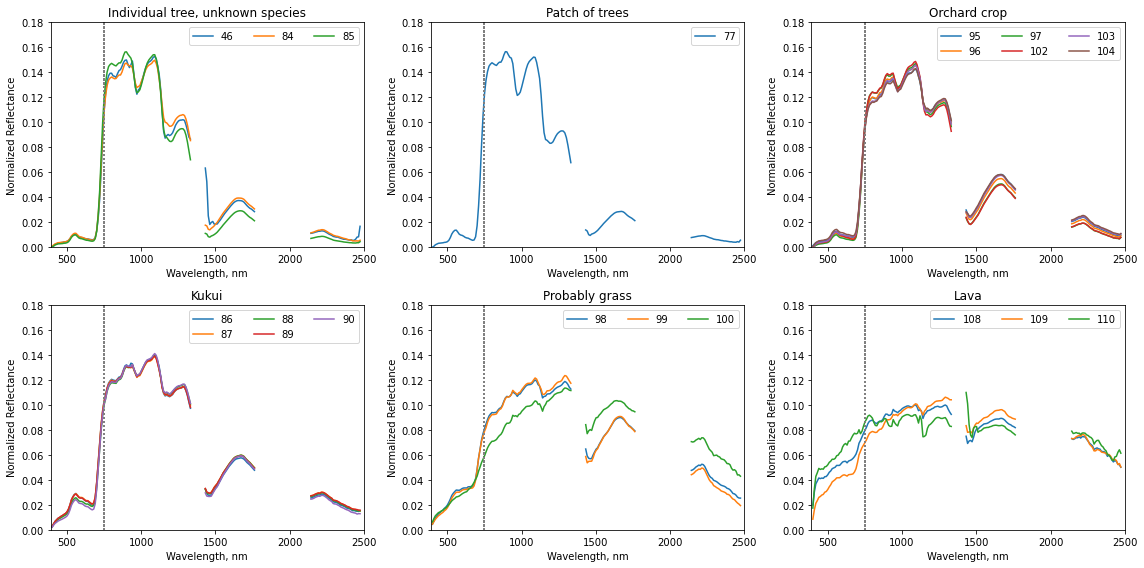

In [7]:
extract.plot_spectra(spectra, wavelengths, include=['Individual tree, unknown species', 'Patch of trees', 'Orchard crop',\
                                                    'Kukui', 'Probably grass', 'Lava'], ylabel='Normalized Reflectance',\
                                                    figname='masked_spectra.png', ylims=(0, 0.18))

### Roofing Materials

Spectra of rooftops are going to depend on:

1. Substrate
2. Treatment/coating
3. Weathering

As explained by Levinson et al. (2007), the reflectance spectrum “depends on the spectral reflectance of the substrate, the thickness of the coating, and the extent to which light passing through the coating is absorbed (converted to heat) and/or back-scattered (reversed in direction) at that wavelength by suspended pigment particles. Reflectance is also influenced by the refractive index of the otherwise-clear coating vehicle”


From my general knowledge and looking at the HPM and Lowes websites, substrates that are present on the Big Island are:

1. Hot-dipped galvanized (HDG) steel
    1. Steel __[coated with zinc](https://galvanizeit.org/corrosion/corrosion-protection/zinc-coatings/batch-hot-dip-galvanizing)__
1. Zincalume-coated steel
    1. "steel coated with an alloy of 55% aluminum, 43.4% zinc, and 1.6% silicon by mass" (Levinson et al. 2007)
1. Aluminium alloy
1. Asphalt shingles
    1. “[Asphalt] roofing materials consist of a fiberglass or felt cloth that is saturated with asphalt and additives, and coated with colored roof granules… Asphalt itself is a complex mixture of hydrocarbons that is a byproduct of the refinement of crude oil into gasoline” (Berdahl et al. 2008)
1. Tiles
    1. Tiles can be __[made from](https://www.restoremastersllc.com/commercial-roofing/roof-tiles/)__ clay (aka terra-cotta, ceramic), concrete (aka cement), slate, wood, plastic/composite, or metal (Al, steel, copper)
1. Plastic-based materials such as shade cloth, polytunnels, and tarps

Most metal substrates on the Big Island are going to be coated/painted. In general, paints are __[composed of](https://www.dunnedwards.com/colors/specs/posts/what-is-paint-made-of)__ pigments, binders (the substance that binds the pigments to the surface when the paint is dry), solvents, and additives. It seems that acrylic is a common binder, especially for exterior paints, and that binders in general are often organic materials (e.g. Pal et al. 2016). Hydrocarbons have absorption features in the IR, so this becomes relevant when we look at spectra of painted materials, below.

HPM offers a __[Durapon 70 color finish](https://www.hpmhawaii.com/custom-metal-roofing-profiles)__ for its roofing products, so Durapon 70 is probably quite widely used on the island.  Durapon 70 is a protective polyvinylidene fluoride coating, __[composed of](https://www.cosasteel.com/pvdf-paint/)__ "70% PVDF resin and 30% acrylic resin, with high-grade weather-resistant pigments (usually inorganic __[ceramic pigments](https://digitalfire.com/article/glaze+and+body+pigments+and+stains+in+the+ceramic+tile+industry)__)".



#### Example spectra: Substrates and weathering

The next figure shows spectra of various roofing substrates, normalized to a max. value of 1 to make it easier to see their shapes and features. Each panel indicates the wavelengths of Fe oxide and C-H absorption bands (approximately), the relevance of which will become clear.

A, B: Unpainted Al, ZnAl steel, and HDG steel ('treated' refers to a thin 'conversion coating', not a protective or colored finish). I doubt we'll see much of these materials, at least in an unweathered state.

C: Weathered steel roofs from the ECOSTRESS library. I'm surprised at the amount of variation in these spectra, but some of the features in the light grey 'weathered galvanized steel' spectrum make sense. First, the three red vertical lines indicate the locations of iron oxide absorption bands at 520, 670, and 870 nm (Herold et al. 2004, sec 4.1). Second, the black vertical lines show the approximate locations of C-H absorptions in the IR. They don't all match up, but perhaps this a rusty roof that has been exposed to hydrocarbons in an urban environment.

D, E: Various kinds of asphalt shingle. There's quite a lot of variation among shingles as well. The spectra of one group slope down through the IR, while the other group has fairly flat spectra. I just split the spectra into two groups so they're easier to see, but the division seems to roughly correspond to lighter colors in the first group and darker ones in the second. There are Fe oxide bands in the 'reddish' spectra, and probably some weak C-H absorptions in some of the spectra as well (given that shingles are made of hydrocarbons, these bands are weaker than I would have predicted, but maybe that's because the absolute reflectance of shingles is low). Finally, the visible part of the spectra doesn't seem closely related to the IR part, in the sense that red, green, and blue shingles can look very different in the visible but quite similar in the IR.

F: Terra cotta tile, a tile of unknown material, and 'composite' shingle (not sure what that is). Fe oxide bands are apparent in the tile spectra. 

While there's quite a lot of variety in the spectra of all these materials, they are all clearly distinct from the tree spectra shown above. Relative to trees, these roofing materials have more signal in the visible and - especially - the NIR.

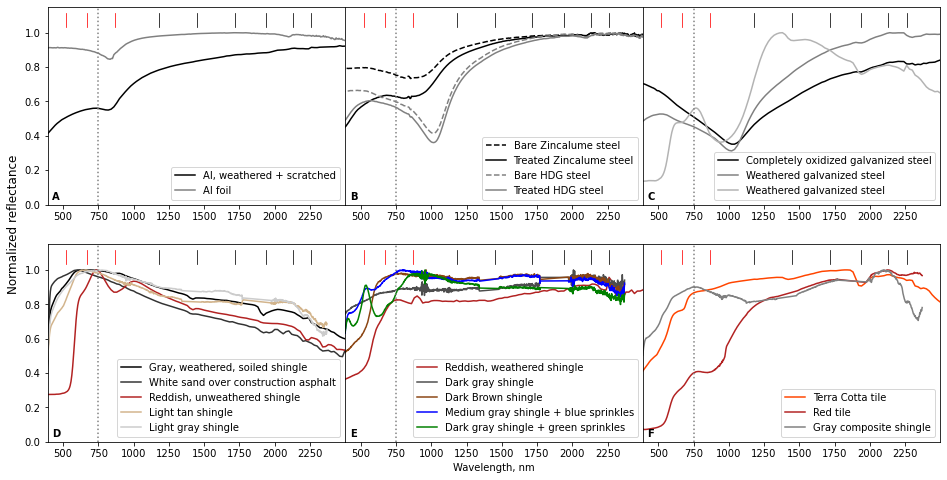

In [9]:
"""
Spectra from the ECOSTRESS library, Levinson et al. (2007), and Herold et al. (2004)
"""

#Various roofing materials from the ECOSTRESS library
ecostress = speclib.get_ecostress(path=library_path+'ecostress_human_materials/', kind="manmade.roofingmaterial")

#Metals from Levinson et al. (2007) figure 3
filename = 'Bare and Treated Steelscape Zincalume, HDG (with delta R)_branding removed.xlsx'
metals = speclib.get_levinson_fig3(path=library_path+'Levinson/'+filename)

#Asphalt shingle and tile from Herold et al. (2004)
shingle = speclib.get_herold(path=library_path+'Herold/rse_spectra.xls')

speclib.plot_by_type(ecostress, metals, shingle)

#### Example spectra: Coatings

Coatings can have a large effect on reflectance spectra. The next figure illustrates some coating characteristics that can have an effect on the spectrum: thickness, background/substrate, and pigment chemistry. These spectra are not normalized; the y axis is absolute fractional reflectance.

A. Three thicknesses of TiO$_2$ rutile white paint over a flat grey background. The thicker coatings have a flatter slope and deeper absorption features. According to Levinson et al. (2005) those absorption features are from the paint binder. Yivlialin et al. (2019) present a spectrum of pure acrylic paint binder that also shows these bands, and says they are C-H vibrational transitions (maybe OH as well).

B. White paint applied over a black background is less reflective and has weaker absorption features than white paint over a white background.

C. Blue-green-purple paints can be distinguished by their visible spectra (obviously), but can be quite similar or dissimilar in terms of their overall IR spectral shape. The usual hydrocarbon absorptions are present.

D. Paints containing cobalt are characterised by a very impressive absorption trough around ~1200-1700 $\mu$m

E. Red paints that contain iron oxides have distinct absorption bands at 520, 670, 870 nm. The 520 nm band is generally not obvious because red paints don't reflect much light at that wavelength. By extension, I'd expect rusty steel roofs to also show these absorption bands (see panel C, previous figure).

F. This is PVC. As a substrate rather than a coated material it really belongs in the previous figure, but it shows that strong hydrocarbon bands can be present in materials other than hydrocarbon paint binders.

Overall, I'd expect painted roofs to be quite distinct from both vegetation and the substrates in the previous figure. If these examples are representative, I'd predict spectra that generally slope downwards through the IR, and moderate-to-strong hydrocarbon bands. There could be some painted roofs that are spectrally similar to shingle roofs, but perhaps that doesn't matter too much for our purposes.

In [ ]:
#TiO2 rutile white coating on grey surface, various thicknesses; Levinson et al. (2007) fig. 2
lfile = 'white and Al coatings2_reformatted.xls'
painted = speclib.get_levinson_fig2(path=library_path+'Levinson/'+lfile)

#Various pigments on white and black backgrounds, Levinson et al. (2005)
pigments = speclib.get_levinson_pigments(path=library_path+'Levinson/')

#PVC from Moreira & Galvao (2010), fig. 5
pvc = speclib.get_moreira(path=library_path+'other/')

speclib.plot_painted(painted, pigments, pvc)

#### The VSWIR spectra

Now let's look at the actual VSWIR spectra of roofs, and see if we can group and identify them based on the above example spectra. The categories below are based on (1) the overall spectral shape, (2) the presence of C-H bands, and (3) what the roofs look like on Google satellite images. I'm not (yet) able to confidently distinguish roofing materials by looking at the satellite (or LiDAR) images, so I don't have 'ground truth' classifications at this point - these are just best guesses.

A note about the Inconsistent category - this is where the spectral shape doesn't appear to match the satellite image:
1. Roof 45 looks like light red tile on image, but visible spectrum is surely blue?
1. Roofs 54 and 55 look rusty but they don' have the same spectrum as other rusty roofs. Have they been replaced since the satellite images were taken?
1. Roof 59 looks red but visible spectrum is surely not red?

In [ ]:

roofs = {key: value for key, value in spectra.items() if key[1] == 'Roof'}
roof_categories = {}

indexes = [key[0] for key in roofs.keys()]

for idx in indexes:
            
    if idx in [31, 34, 50, 52, 57]:
        roof_categories[(idx, '0: White paint')] = roofs[(idx, 'Roof')]
    elif idx in [2, 3, 4, 20, 40, 41, 70, 93]:
        roof_categories[(idx, '1: Blue-green paint (no cobalt)')] = roofs[(idx, 'Roof')]
    elif idx in [12, 25, 28, 39, 44, 48, 51, 58, 68, 76]:
        roof_categories[(idx, '2: Blue-green-purple paint (with cobalt)')] = roofs[(idx, 'Roof')]
    elif idx in [17, 18, 22, 23, 32, 47, 79]:
        roof_categories[(idx, '3: Yellow-red paint')] = roofs[(idx, 'Roof')]
    elif idx in [8, 9, 21, 36, 38, 61, 73, 81, 82]:
        roof_categories[(idx, '4: Some kind of paint, often off-white')] = roofs[(idx, 'Roof')]
    elif idx in [11, 16, 24, 26, 35, 49, 60, 71, 72, 75, 92]:
        roof_categories[(idx, '5: Another kind of pale-ish paint')] = roofs[(idx, 'Roof')]
    elif idx in [15, 30, 37, 66]:
        roof_categories[(idx, '6: Brown or brick-red paint')] = roofs[(idx, 'Roof')]
    elif idx in [42, 53, 67, 69]:
        roof_categories[(idx, '7: Rusty (and/or dirty?)')] = roofs[(idx, 'Roof')]
    elif idx in [5, 6, 7, 10, 27, 29, 62, 78]:
        roof_categories[(idx, '8: Asphalt shingle?')] = roofs[(idx, 'Roof')]
    elif idx in [1, 64]:
        roof_categories[(idx, '9_0: Red tile? Shingle?')] = roofs[(idx, 'Roof')]
    elif idx in [19, 43, 56, 63, 65, 74, 83, 101]:
        roof_categories[(idx, '9_1: Not sure ("Camel humps")')] = roofs[(idx, 'Roof')]
    elif idx in [45, 54, 55, 59]:
        roof_categories[(idx, '9_2: Inconsistent')] = roofs[(idx, 'Roof')]
    elif idx in [33]:
        roof_categories[(idx, '9_3: Composite shingle??/no idea')] = roofs[(idx, 'Roof')]
    else:
        print(idx)
        roof_categories[(idx, '91: Uncategorized')] = roofs[(idx, 'Roof')]

extract.plot_spectra(roof_categories, wavelengths, indicate_wavs=[750], figname='reclass_roofs.png')

And here are the same groupings but with the spectra plotted individually.

In [ ]:
kwargs = {'cols': 5, 'indicate': 750}

keys = extract.order_spectra(roofs, key_list=[(k, 'Roof') for k in [31, 34, 50, 52, 57]])
kwargs.update({'rows': 1, 'figsize': (16, 3), 'title': 'White paint', 'fname': 'WhitePaint.png'})
extract.plot_single_category(keys, wavelengths, **kwargs)

keys = extract.order_spectra(roofs, key_list=[(k, 'Roof') for k in [2, 3, 4, 20, 40, 41, 70, 93]])
kwargs.update({'rows': 2, 'figsize': (16, 6), 'title': 'Blue-green paint (no cobalt)', 'fname': 'BlueGreen.png'})
extract.plot_single_category(keys, wavelengths, **kwargs)

keys = extract.order_spectra(roofs, key_list=[(k, 'Roof') for k in [12, 25, 28, 39, 44, 48, 51, 58, 68, 76]])
kwargs.update({'title': 'Blue-green-purple paint (with cobalt)', 'fname': 'Cobalt.png'})
extract.plot_single_category(keys, wavelengths, **kwargs)

keys = extract.order_spectra(roofs, key_list=[(k, 'Roof') for k in [17, 18, 22, 23, 32, 47, 79]])
kwargs.update({'title': 'Yellow-red paint', 'fname': 'YellowRed.png'})
extract.plot_single_category(keys, wavelengths, **kwargs)

keys = extract.order_spectra(roofs, key_list=[(k, 'Roof') for k in [8, 9, 21, 36, 38, 61, 73, 81, 82]])
kwargs.update({'rows': 2, 'figsize': (16, 6), 'title': 'Some kind of paint, often off-white', 'fname': 'OffWhite.png'})
extract.plot_single_category(keys, wavelengths, **kwargs)

keys = extract.order_spectra(roofs, key_list=[(k, 'Roof') for k in [11, 16, 24, 26, 35, 49, 60, 71, 72, 75, 92]])
kwargs.update({'rows': 3, 'figsize': (16, 9), 'title': 'Another kind of pale-ish paint', 'fname': 'Pale.png'})
extract.plot_single_category(keys, wavelengths, **kwargs)

keys = extract.order_spectra(roofs, key_list=[(k, 'Roof') for k in [15, 30, 37, 66]])
kwargs.update({'rows': 1, 'figsize': (16, 3), 'title': 'Brown and/or brick-red paint', 'fname': 'BrownPaint.png'})
extract.plot_single_category(keys, wavelengths, **kwargs)

keys = extract.order_spectra(roofs, key_list=[(k, 'Roof') for k in [42, 53, 67, 69]])
kwargs.update({'title': 'Rusty and/or dirty', 'fname': 'Rusty.png'})
extract.plot_single_category(keys, wavelengths, **kwargs)

keys = extract.order_spectra(roofs, key_list=[(k, 'Roof') for k in [5, 6, 7, 10, 27, 29, 62, 78]])
kwargs.update({'rows': 2, 'figsize': (16, 6), 'title': 'Asphalt shingle?', 'fname': 'Asphalt.png'})
extract.plot_single_category(keys, wavelengths, **kwargs)

keys = extract.order_spectra(roofs, key_list=[(k, 'Roof') for k in [1, 64]])
kwargs.update({'rows': 1, 'figsize': (16, 3), 'title': 'Red tile? Shingle?', 'fname': 'RedTile.png'})
extract.plot_single_category(keys, wavelengths, **kwargs)

keys = extract.order_spectra(roofs, key_list=[(k, 'Roof') for k in [19, 43, 56, 63, 65, 74, 83, 101]])
kwargs.update({'rows': 2, 'figsize': (16, 6), 'title': 'Not sure ("camel humps")', 'fname': 'Camel.png'})
extract.plot_single_category(keys, wavelengths, **kwargs)

keys = extract.order_spectra(roofs, key_list=[(k, 'Roof') for k in [45, 54, 55, 59]])
kwargs.update({'rows': 1, 'figsize': (16, 3), 'title': 'Inconsistent', 'fname': 'Inconsistent.png'})
extract.plot_single_category(keys, wavelengths, **kwargs)

keys = extract.order_spectra(roofs, key_list=[(k, 'Roof') for k in [33]])
kwargs.update({'title': 'No idea', 'fname': 'Dunno.png'})
extract.plot_single_category(keys, wavelengths, **kwargs)

### Grass, roads, and lava fields

I haven't paid much attention to these yet. Road 107 is a section of paved road in the Kona Paradise subdivision, road 106 is a segment of the highway (belt road), and road 105 is a road/driveway that wasn't there in the satellite images but that is present in the VSWIR IRGB image.

In [ ]:
extract.plot_spectra(spectra, wavelengths, include=['Road', 'Lava', 'Probably grass'], ylabel='Normalized Reflectance',\
                     figname='masked_spectra.png', ylims=(0, 0.18))

### Other infrastructure/materials

In [ ]:
extract.plot_spectra(spectra, wavelengths, include=['Solar panels', 'Pool'], ylabel='Normalized Reflectance',\
                     figname='masked_spectra.png', ylims=(0, 0.18))

## References

1. Berdahl, P., Akbari, H., Levinson, R., & Miller, W. A. (2008). __[Weathering of roofing materials–an overview.](https://www.sciencedirect.com/science/article/pii/S0950061806002923)__ Construction and building materials, 22(4), 423-433.
1.  Herold, M., Roberts, D. A., Gardner, M. E., & Dennison, P. E. (2004). __[Spectrometry for urban area remote sensing—Development and analysis of a spectral library from 350 to 2400 nm.](https://www.sciencedirect.com/science/article/pii/S0034425704000768)__ Remote sensing of environment, 91(3-4), 304-319.
1. Levinson, R., Berdahl, P., & Akbari, H. (2005). __[Solar spectral optical properties of pigments—Part II: survey of common colorants.](https://www.sciencedirect.com/science/article/pii/S092702480500005X)__ Solar Energy Materials and Solar Cells, 89(4), 351-389.
1. Levinson, R., Berdahl, P., Akbari, H., Miller, W., Joedicke, I., Reilly, J., ... & Vondran, M. (2007). __[Methods of creating solar-reflective nonwhite surfaces and their application to residential roofing materials.](https://www.sciencedirect.com/science/article/pii/S0927024806004077)__ Solar Energy Materials and Solar Cells, 91(4), 304-314.
1. Moreira, R. C., & Galvão, L. S. (2010). __[Variation in spectral shape of urban materials.](https://www.tandfonline.com/doi/pdf/10.1080/01431161003692032)__ Remote Sensing Letters, 1(3), 149-158.
1. Pal, S., Contaldi, V., Licciulli, A., & Marzo, F. (2016). __[Self-cleaning mineral paint for application in architectural heritage](https://mdpi-res.com/d_attachment/coatings/coatings-06-00048/article_deploy/coatings-06-00048-v2.pdf?version=1476877935)__. Coatings, 6(4), 48.
1. Yivlialin, R., Galli, A., Raimondo, L., Martini, M., & Sassella, A. (2019). __[Detecting the NIR Fingerprint of Colors: The Characteristic Response of Modern Blue Pigments.](https://mdpi-res.com/d_attachment/heritage/heritage-02-00137/article_deploy/heritage-02-00137-v2.pdf?version=1566986353)__ Heritage, 2(3), 2255-2261.


In [ ]:
!jupyter nbconvert extract.ipynb --to html --ExtractOutputPreprocessor.enabled=False

***
Note to self:

To reproduce results for Paakai-Honaunau test region:

data_path = '/data/gdcsdata/HawaiiMapping/Algorithm_Building_Mosaics/paakai_honaunau_nofill/'

roi = (1331, 4460, 1000, 1000) #The subset of the images to read - currently a 1000 x 1000 pix piece of S. Kona

Use roofs.shp file in '/data/gdcsdata/test_directory/rmason_test/'